<h1>Test with synthetic data</h1>

In [13]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import pylab as plt
import numpy as np
import pandas as pd
import seaborn as sns
from IPython.display import display, HTML

from multifile_lda import MultifileLDA
from multifile_analysis import MultifileAnalysis
from multifile_viz import MultifileLDAViz
from lda_generate_data import LdaDataGenerator

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


<h2>1. Generate some synthetic data</h2>

In [14]:
K = 10
n_docs = 100
vocab_size = 200
document_length = 100
copies = 4

alpha = 0.1
beta = 0.01    

In [15]:
gen = LdaDataGenerator(alpha, make_plot=True)

Generating count matrices


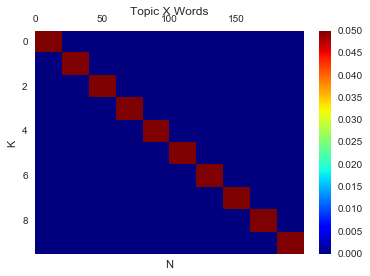

(100, 200)


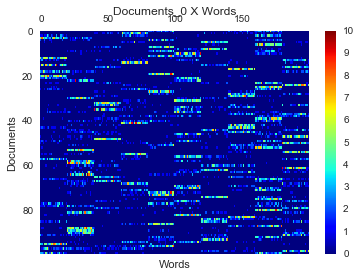

(100, 200)


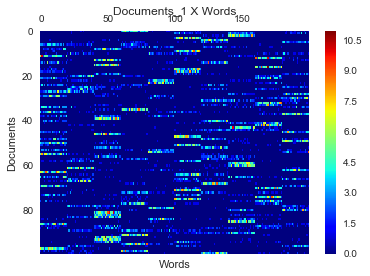

(100, 200)


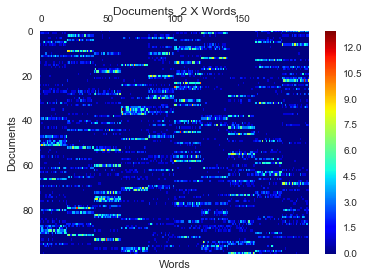

(100, 200)


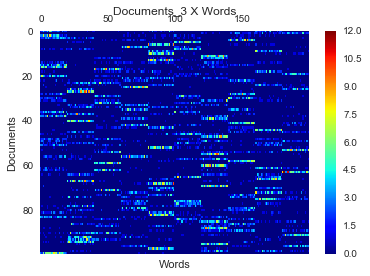

In [16]:
counts, vocab = gen.generate_input_counts(K, vocab_size, document_length, n_docs, copies)

In [17]:
print vocab[0:10]

['word_0' 'word_1' 'word_2' 'word_3' 'word_4' 'word_5' 'word_6' 'word_7'
 'word_8' 'word_9']


<h2>2. Run LDA</h2>

In [18]:
lda = MultifileLDA(counts, vocab)
n_samples = 200
n_burn = 100
n_thin = 5
lda.run(K, alpha, beta, n_burn, n_samples, n_thin, use_last_sample=False)

Initialising 
 - file 0 ..........
 - file 1 ..........
 - file 2 ..........
 - file 3 ..........

Using Numpy for multi-file LDA sampling
Burn-in     1 ..  Log likelihood = -311381.672 
Burn-in     2 ..  Log likelihood = -296844.779 
Burn-in     3 ..  Log likelihood = -266429.401 
Burn-in     4 ..  Log likelihood = -226606.290 
Burn-in     5 ..  Log likelihood = -200766.829 
Burn-in     6 ..  Log likelihood = -187669.129 
Burn-in     7 ..  Log likelihood = -180925.731 
Burn-in     8 ..  Log likelihood = -177078.606 
Burn-in     9 ..  Log likelihood = -175376.325 
Burn-in    10 ..  Log likelihood = -174143.788 
Burn-in    11 ..  Log likelihood = -173245.767 
Burn-in    12 ..  Log likelihood = -172406.928 
Burn-in    13 ..  Log likelihood = -171873.123 
Burn-in    14 ..  Log likelihood = -171618.469 
Burn-in    15 ..  Log likelihood = -171389.288 
Burn-in    16 ..  Log likelihood = -171146.495 
Burn-in    17 ..  Log likelihood = -171077.476 
Burn-in    18 ..  Log likelihood = -170928.06

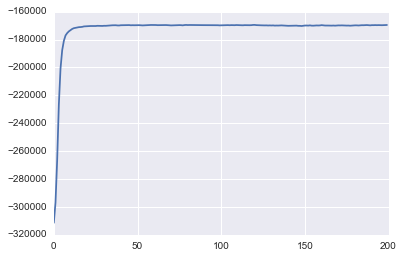

In [25]:
plt.plot(lda.log_likelihoods)

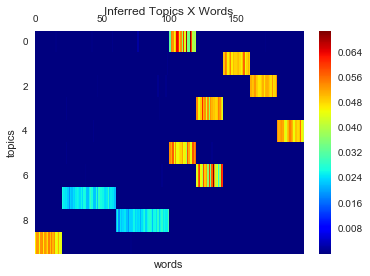

In [26]:
gen._plot_nicely(lda.topic_word_, 'Inferred Topics X Words', 'words', 'topics')

In [27]:
pa = lda.posterior_alphas
print len(pa)

20


In [28]:
analysis = MultifileAnalysis()
analysis.load_synthetic(counts, vocab, lda)
viz = MultifileLDAViz(analysis)

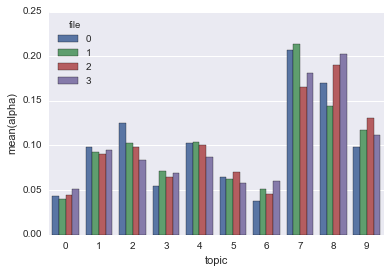

In [29]:
df = viz.plot_e_alphas()

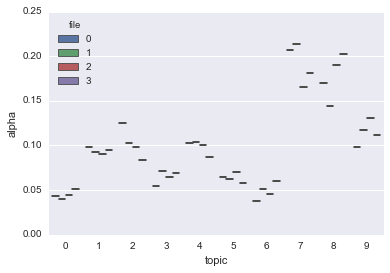

In [30]:
df = viz.plot_boxplot_alphas()